In [13]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [14]:
path_train = r"F:\python\EveryDayCoding\ComputerVision\HumanEmotion\Dataset\train"
path_test = r"F:\python\EveryDayCoding\ComputerVision\HumanEmotion\Dataset\test"

In [15]:
def get_data(path:str) -> "X, y":
    X = []
    y = []
    for i in os.listdir(path):
        for j in os.listdir(path + "/" + i):
            image_read = cv2.imread(f"{path}/{i}/{j}", cv2.IMREAD_GRAYSCALE)
            image_read = image_read.reshape(image_read.shape[0] * image_read.shape[1])/255
            X.append(image_read)
            y.append(i)
            
    return X, y


In [16]:
df_train_X, df_train_y = get_data(path_train)
df_test_X, df_test_y = get_data(path_test)

In [17]:
encode_type = preprocessing.LabelEncoder()

In [18]:
df_train_y = encode_type.fit_transform(df_train_y)
df_test_y = encode_type.fit_transform(df_test_y)

In [19]:
np.unique(df_train_y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [20]:
print("encode y test data\n")
for numerik, nominal in zip(np.unique(df_test_y), encode_type.inverse_transform(np.unique(df_test_y))):
    print(f"{numerik} --> {nominal}")

encode y test data

0 --> angry
1 --> disgust
2 --> fear
3 --> happy
4 --> neutral
5 --> sad
6 --> surprise


In [21]:
print("encode y train data\n")
for numerik, nominal in zip(np.unique(df_train_y), encode_type.inverse_transform(np.unique(df_train_y))):
    print(f"{numerik} --> {nominal}")

encode y train data

0 --> angry
1 --> disgust
2 --> fear
3 --> happy
4 --> neutral
5 --> sad
6 --> surprise


In [22]:
np.shape(df_train_X)


(28709, 2304)

In [23]:
np.shape(df_train_y)

(28709,)

##  Relearn about tensor. it's important!!!

In [24]:
tf.stack(df_train_X)

<tf.Tensor: shape=(28709, 2304), dtype=float64, numpy=
array([[0.19607843, 0.1254902 , 0.05882353, ..., 0.56078431, 0.53333333,
        0.3254902 ],
       [0.11372549, 0.09411765, 0.11372549, ..., 0.05882353, 0.09411765,
        0.09411765],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48627451, 0.50588235, 0.49019608, ..., 0.98039216, 0.95294118,
        0.98431373],
       [0.94901961, 0.94901961, 0.94901961, ..., 0.66666667, 0.76470588,
        0.79607843],
       [0.76078431, 0.77254902, 0.74901961, ..., 1.        , 1.        ,
        1.        ]])>

In [25]:
model = keras.Sequential(
[
    keras.layers.Dense(200, input_shape = (np.shape(df_train_X)[1],), activation = "sigmoid" ),
    keras.layers.Dense(100, activation = "sigmoid"),
    keras.layers.Dense(7, activation = "sigmoid")
])

In [26]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [27]:
model.fit(tf.stack(df_train_X), df_train_y, epochs=20)

Epoch 1/20
898/898 [==============================] - 16s 7ms/step - loss: 1.7943 - accuracy: 0.2588
Epoch 2/20
898/898 [==============================] - 6s 7ms/step - loss: 1.7134 - accuracy: 0.3213
Epoch 3/20
898/898 [==============================] - 5s 6ms/step - loss: 1.6859 - accuracy: 0.3357
Epoch 4/20
898/898 [==============================] - 5s 6ms/step - loss: 1.6706 - accuracy: 0.3418
Epoch 5/20
898/898 [==============================] - 5s 6ms/step - loss: 1.6646 - accuracy: 0.3478
Epoch 6/20
898/898 [==============================] - 6s 7ms/step - loss: 1.6541 - accuracy: 0.3533
Epoch 7/20
898/898 [==============================] - 5s 6ms/step - loss: 1.6499 - accuracy: 0.3534
Epoch 8/20
898/898 [==============================] - 6s 7ms/step - loss: 1.6388 - accuracy: 0.3597
Epoch 9/20
898/898 [==============================] - 6s 6ms/step - loss: 1.6301 - accuracy: 0.3645
Epoch 10/20
898/898 [==============================] - 6s 6ms/step - loss: 1.6232 - accuracy: 0.361

In [28]:
model.evaluate(tf.stack(df_test_X), df_test_y)

225/225 [==============================] - 13s 8ms/step - loss: 1.5997 - accuracy: 0.3816


[1.5996642112731934, 0.3815826177597046]

In [ ]:
# confusion_matrix = tf.math.confusion_matrix(labels=df_test_y, predictions=Y_predict_label)
# plt.pyplot.figure(figsize = (10,7))
# sn.heatmap(confusion_matrix, annot=True, fmt='d')
# plt.pyplot.xlabel('Predicted')
# plt.pyplot.ylabel('Truth')

#### Trying edge detection

In [99]:
path_train = r'F:\python\EveryDayCoding\ComputerVision\HumanEmotion\Dataset\train\fear'

In [100]:
print(os.listdir(path_train)[20])

Training_10528695.jpg


In [110]:
read_image = cv2.imread(f"{path_train}/{os.listdir(path_train)[50]}",cv2.IMREAD_GRAYSCALE)

In [111]:
print(read_image)

[[251 124  27 ... 255 255 255]
 [146  45  36 ... 255 255 255]
 [ 60  32  25 ... 255 255 255]
 ...
 [164 173 174 ... 226 253 255]
 [165 171 173 ... 240 255 255]
 [157 180 168 ... 250 255 252]]


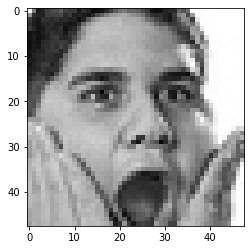

In [112]:
plt.imshow(read_image, 'gray')

In [113]:
read_image.shape

(48, 48)

In [114]:
canny = cv2.Canny(read_image, 200, 200)

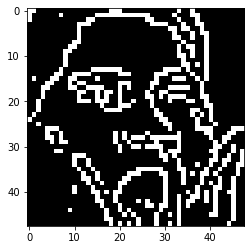

In [115]:
plt.imshow(canny, 'gray')

In [116]:
read_image_resize = cv2.resize(read_image, fx = 4, fy = 4, dsize = None)

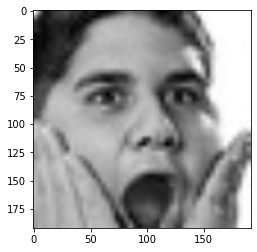

In [117]:
plt.imshow(read_image_resize, 'gray')

In [118]:
canny_resize = cv2.Canny(read_image_resize, 200, 200)

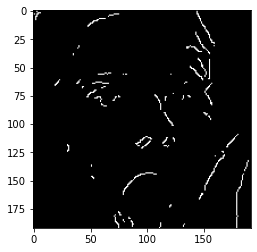

In [119]:
plt.imshow(canny_resize, 'gray')

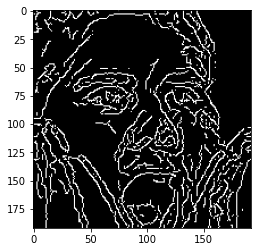

In [120]:
canny_resize = cv2.Canny(read_image_resize, 20, 50)
plt.imshow(canny_resize, 'gray')